In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 
import scipy.optimize as optimize

## Forward start options and model of bates

Forward start options are also called the performance options. The value of an option does not depend on the value of the stock, but on the stock performance. 


Forward starting options may be considered as European options with a future starting time

Whereas in European options, the initial stock value is known $S_0$ at initial time $t_0$ in the case of forward starting options the initial stock value is unknown as it will be determined at some future time $T_1$

Forward starting options do not depend on today's value of the underlying asset but on the value which is based on the performance of the asset over some future time period $[T_1,T_2]$

Forward starting options are often considered as building block for other financial derivatives, like cliquet (ratchet) options, consisting of a series of a series of consecutive forward start options. Cliquet options are encountered in the equity and interest rate markets.

A useful feature of cliquet options contracts is that tehy allow for a periodic locking in of profits. If a certain asset performed well a period $ [T_i, T_{i+1}]$ but performed poorly in $ [T_{i+1}, T_{i+2}]$ an investor will receive the profit accumulated in the first period. As the profit can be limited as well i.e.:the profit cannot be larger than $7\%$ cliquet options may be a relatiove cheap alternative for a plain-vanilla european options.

## Forwart start option contract

$$V(t_0,T_1,T_2) = max (\frac{S(T_2) - S(T_1)}{S(T_1)} - K,0)$$

The contract value is determined by the percentage performance of $S(t)$ measured at the future times $T_1 \text{and }T_2$.
For $t_0=T_1$ the option collapse to an european style option:
$$V(t_0,t_0,T_2) =\frac{1}{S_0} max ( S(T_2) - K^*),0), K^*=S_0(K+1)$$

The Payoff can also be redefined:
$$V(t_0,T_1,T_2) = max (\frac{S(T_2)}{S(T_1)} - (K + 1)$$

today's value of the contract, assuming constant interest rates is given by the followin expectation:
$$V(t_0,S,T_1,T_2) = M(t_0) \mathbb{E}^{Q} \bigg[ \frac{1}{M(T_2)} max\bigg(\frac{S(T_2)}{S(T_1)} - (K + 1),0\bigg) | \mathcal{F}(t_0)\bigg]$$

where M(t) is the money savings account

Re-arranging:

$$V(t_0,S,T_1,T_2) = \frac{M(t_0)}{M(T_2)} \mathbb{E}^{Q} \bigg[max\bigg(\frac{S(T_2)}{S(T_1)} - (K + 1),0\bigg) | \mathcal{F}(t_0)\bigg]$$
$$V(t_0,S,T_1,T_2) = \frac{M(t_0)}{M(T_2)} \mathbb{E}^{Q} \bigg[max\bigg(e^{x(T_1,T_2)} - (K + 1),0\bigg) | \mathcal{F}(t_0)\bigg]$$


where:
$$x(T_1,T_2) \coloneqq log X (T_1,T_2) = log\frac{S(T2)}{S(T_1)} = log(S(T_2)- log(S(T_1)))$$

There are multiple ways to pricing forward starting options:
- Monte Carlo assumptions
- PDE approach
- analytical solution 
- generic solution for model belonging to the affine class of processes.



## Characteristic Function for the Frwd-Start Options
We can derive the characteristic function of $x(T_1,T_2)$
$$\phi_x(z) \equiv \phi_x(z,t_0,T_1,T_2) = \mathbb{E}^{Q} \bigg[ e^{iz (log(S(T_2)) - log(S(T_1)))}|\mathcal{F}_{t_0}\bigg]$$
By iterated expectations we have:
$$\phi_x(z) = \mathbb{E}^{Q} \bigg[\mathbb{E}^{\mathbb{Q}}\bigg[ e^{iz (log(S(T_2)) - log(S(T_1)))}|\mathcal{F}_{t_1}\bigg]|\mathcal{F}_{t_0}\bigg]$$
 

As $log S(T_1)$ is measurable with respect to the filtration $\mathcal{F}_{t_1}$, we can write:
$$\phi_x(z) = \mathbb{E}^{Q} \bigg[e^{iz log S(T_1)} \mathbb{E}^{\mathbb{Q}} \bigg[ e^{iz logS(T_2)}|\mathcal{F}_{t_1}\bigg]|\mathcal{F}_{t_0}\bigg]$$

In terms of a discounted characteristic function, we need to insert an appropriate discount term:
$$\phi_x(z) = \mathbb{E}^{Q} \bigg[e^{iz log S(T_1)}e^{-r(T_2 - t_1)}  \mathbb{E}^{\mathbb{Q}} \bigg[ e^{iz logS(T_2)}e^{-r(T_2 - t_1)}|\mathcal{F}_{t_1}\bigg]|\mathcal{F}_{t_0}\bigg]$$

The inner expectation can be recognized as the discounted characteristic function of X(T_2) = log S(T_2) and therefore it follows that:
$$\phi_x(,t_0,T_1,T_2) = \mathbb{E}^{Q} \bigg[e^{iz log S(T_1)}e^{-r(T_2 - t_1)} \psi_x(z,t_0,T_1,T_2)|\mathcal{F}_{t_0}\bigg]$$

The function $ \psi_x(z,t_0,T_1,T_2)$ can have different definitions for tow different asset dynamics: Heston and Black-Scholes.

## Black-Scholes case

$$ \psi_X(z,T_1,T_2) = exp\bigg[\bigg(r- \frac{1}{2}\sigma^2\bigg)iz(T_2 - T_1) - \frac{1}{2}\sigma^2z^2 (T_2 - T_1) - r(T_2 - T_1) + izX(T_1)\bigg]

By substitution of the forward characteristic function of the Black-Scholes model, the following expression for the forward characteristic function $\phi_x(z)$ of $x(T_1,T_2)$ is obtained:
$$ \phi_X(z,T_1,T_2) = exp\bigg[\bigg(r- \frac{1}{2}\sigma^2\bigg)iz(T_2 - T_1) - \frac{1}{2}\sigma^2z^2 (T_2 - T_1) - r(T_2 - T_1)\bigg]

Important remark: The forward characteristic function does not depend on $X_0$
but this is a consequence of the fact that the ratio $\frac{S(T2)}{S(T1)}$, under the lognormal asset dynamics, gives as the solution:
$$ \frac{S(T2)}{S(T1)} = exp\bigg[\bigg(r- \frac{1}{2}\sigma^2\bigg)(T_2 - T_1) +\sigma(W(T_2)- W(T_1))\bigg]$$


## Pricing of forward start option under BS model
$$V(S,T_1,T_2) = e^{-rT_2} \mathbb{E}^{Q} \bigg[max\bigg(e^{\frac{S(T2)}{S(T1)}} - K^*,0\bigg) | \mathcal{F}(t_0)\bigg]$$
$$V(S,T_1,T_2) = e^{-rT_2}\int_{-\infty}^{\infty} max\bigg(e^{\frac{S(T2)}{S(T1)}} - K^*,0\bigg) | \mathcal{F}(t_0)$$
$$V(S,T_1,T_2) = e^{-rT_2}\int_{-\infty}^{\infty} \bigg(e^{\frac{S(T2)}{S(T1)}} - K^*\bigg) \mathcal{1}{\bigg(\frac{S(T2)}{S(T1)} >K^*\bigg)}f_{\mathcal{N}(0,1)}(x)dx$$




where $\mathcal{1}\bigg(\frac{S(T2)}{S(T1)}>K^*\bigg)$ is an indicator function
$$ \mathcal{1}\bigg(exp\bigg[\bigg(r- \frac{1}{2}\sigma^2\bigg)(T_2 - T_1) +\sigma(W(T_2)- W(T_1))\bigg]>K^*\bigg)$$
$$ \mathcal{1}\bigg(exp\bigg[\bigg(r- \frac{1}{2}\sigma^2\bigg)(T_2 - T_1) +\sigma \sqrt{(T_2 - T_1)}W \bigg]>K^*\bigg)$$
$$ \mathcal{1} \bigg\{W >\frac{log K^* - \bigg(r -  \frac{1}{2}\sigma^2\bigg)(T_2 - T_1)}{\sigma \sqrt{(T_2 - T_1)}}\bigg\}$$
where $ W \sim \mathcal{N}(0,1)$
we can write $\alpha = \frac{1}{\sigma \sqrt{(T_2 - T_1)}} \bigg(log K^* - \bigg(r -  \frac{1}{2}\sigma^2\bigg)\bigg)$

$$V(S,T_1,T_2) = \frac{1}{2\pi} e^{-rT_2}\int_{-a}^{\infty} exp\bigg[\bigg(r- \frac{1}{2}\sigma^2\bigg)(T_2 - T_1) +\sigma \sqrt{T_2- T_1}x\bigg] e^{-\frac{x^2}{2}}dx - K e^{-rT_2} f_{\mathcal{N}}(0,1)(-\alpha)$$
the first integral can be rewritten as 
$$ \frac{exp\bigg[(r- \frac{1}{2}\sigma^2)(T_2 - T_1) +  \frac{1}{2}\sigma^2(T_2 - T_1)  \bigg]}{\sqrt{2\pi}} \int_{-a}^{\infty} e^{-\frac{1}{2} (x - \sigma \sqrt{T_2 - T_1})^2 }dx $$


$$ V(S,T_1,T_2) =e^{-rT_1} F_{\mathcal{N}(0,1)} (d_1) - e^{-rT_2}K^*F_{\mathcal{N}(0,1)}(d_2)$$

- $ d_1 \colon= \sigma \sqrt{T_2 - T_1} - \alpha = \frac{1}{\sigma \sqrt{T_2 - T_1}} \bigg[log\bigg( \frac{1}{K^*} + \bigg(r + \frac{1}{2}\sigma^2\bigg) (T_2 - T_1)\bigg]$
- $ d_2 \colon=  - \alpha$

$$ $$

## Fwd Start ChF for the Heston model
$$\phi_x(,t_0,T_1,T_2) = \mathbb{E}^{Q} \bigg[e^{iz X(T_1)}e^{-r(T_2 - t_1)} \psi_x(z,t_0,T_1,T_2)|\mathcal{F}_{t_0}\bigg]$$
To detail this characteristic function under the Heston SV model, an expression for $\psi_x(z,t_0,T_1,T_2)$ is required. This characteristic function with vector $z^T=(log(X(t)),0)^T$
we are interesting only in the density of the stock and we do not need a second dimension for the volatility:
$$\psi_x(z,t_0,T_1,T_2) = e^{\bar{A}(z,\tau) + \bar{B}(z,\tau)X(T_1) + \bar{C}(z\tau) v(T_1)} $$
Since the first element of $z$ is $log((X(T_1)))$ the dependece from $X(T_1)$ will be gone.

with $ \tau = T_2 - T_1 $ and the complex-valued functions $ \bar{A}(z,\tau) \text{ and } \bar{B}(z,\tau)$


Recall that for the Heston model $\bar{B}(z,\tau)=iz$ which simplifies the expression for $\phi_x(z)$ as follows:
$$\phi_x(z) = \mathbb{E}^{Q} \bigg[e^{-r(T_2 - T_1)} e^{ \bar{A}(z,\tau) +  \bar{C}(z\tau) v(T_1)}|\mathcal{F}_{t_0}\bigg]$$
$$\phi_x(z) = e^{r(T_2 - T_1) + \bar{A}(z,\tau) } \mathbb{E}^{Q} \bigg[ e^{\bar{C}(z\tau) v(T_1)}|\mathcal{F}_{t_0}\bigg]$$

the forward characteristic function under the Heston dynamic is completely determined in terms of the model's volatility. 
To complete the derivation for the Heston model, the expectation in the last equation is a representation of the moment-generating function of v(t). The theorem below provided us with the corresponding solution

## The moment generating function for the CIR process
$$ dv(t) = \kappa(\bar{v} - v(t))dt + \gamma \sqrt{v(t)}dW_v(t), v(t_0)=v_0$$
for $t \geq 0$ the  moment generating function (or Laplace transformation) has the following form:
$$ \mathbb{E}^{\mathbb{Q}} \bigg[ ezv(t) | \mathcal{F}(t_0)\bigg] = \bigg( \frac{1}{1- 2u\bar{c}(t,t_0)}\bigg)^{\frac{1}{2}\delta} exp\bigg\{\frac{u\bar{c}(t,t_0)\bar{\kappa}(t,t_0)}{1 - 2u\bar{c}(t,t_0)}\bigg\}

where the parameters $\bar{c}(t,t_0)$, degrees of freedom $\delta$, and  non-centrality parameter $\bar{kappa}(t,t_0)$ are given by:
-  $\bar{c}(t,t_0)= \frac{\gamma^2}{4\kappa}(1- e^{-\kappa(t-t_0)})$
- $\delta = \frac{4\kappa \bar{v}}{\gamma^2}$
- $\bar{\kappa}(t,t_0) = \frac{4\kappa v_0 e^{-\kappa(t-t_0)}}{\gamma^2(1-e^{-k(t-t_0)})}$

Now we can substitute this equation in the forward characteristic function:
$$ \phi_x(z) = e^{r(T_2 - T_1) + \bar{A}(z,\tau) } \mathbb{E}^{Q} \bigg[ e^{\bar{C}(z\tau) v(T_1)}|\mathcal{F}_{t_0}\bigg]$$
$$ \phi_x(z) = exp\bigg\{ \bar{A}(z,\tau) + r\tau + \frac{\bar{C}(z,\tau) \bar{c} (T_1,t_0) \bar{\kappa}(T_1,t_0)}{1 - 2\bar{C}(z,\tau)\bar{c}(T_1,t_0)}\bigg\}
\times \bigg(\frac{1}{1-2\bar{C}(z,\tau) \bar{c}(T_1,t_0)}\bigg)$$

with $\tau = T_2 - T_1$. <br>
$\bar{C}$ is derived in the book.

## Forward Implied volatility
In this experiment we consider the following set of parameters:
- $r=0$
- $\kappa = 0.6$
- $\bar{v}=0.1$
- $\gamma = 0.2$ 
- $\rho_{x,v}= -0.5$
- $v(t_0)=0.05$

In a first test, we set $T_1= 1,2,3,4$ and $T_2 =T_1 + 2$


While in a second test we take $T_1 = 1$ and $T_2 = 2,3,4,5$.

/var/folders/zv/yh2kwtrj003cc_tbwt7gr8r40000gn/T/ipykernel_16304/1142945482.py:90: RuntimeWarning: divide by zero encountered in divide
  d1    = (np.log(1.0 / K) + (r + 0.5 * np.power(sigma,2.0))* tau) / (sigma * np.sqrt(tau))


Initial volatility = [0.31192467]
Final volatility = [0.3119319]
Initial volatility = [0.30208092]
Final volatility = [0.30208715]
Initial volatility = [0.29359471]
Final volatility = [0.29360364]
Initial volatility = [0.28631279]
Final volatility = [0.28631625]
Initial volatility = [0.28011355]
Final volatility = [0.28011299]
Initial volatility = [0.27490873]
Final volatility = [0.27490777]
Initial volatility = [0.27062136]
Final volatility = [0.27062241]
Initial volatility = [0.26716387]
Final volatility = [0.26717596]
Initial volatility = [0.26445985]
Final volatility = [0.2644806]
Initial volatility = [0.26242763]
Final volatility = [0.26244284]
Initial volatility = [0.26096025]
Final volatility = [0.26096793]
Initial volatility = [0.25992889]
Final volatility = [0.25996498]
Initial volatility = [0.25928935]
Final volatility = [0.25935099]
Initial volatility = [0.2589699]
Final volatility = [0.2590532]
Initial volatility = [0.25890957]
Final volatility = [0.25900971]
Initial volati

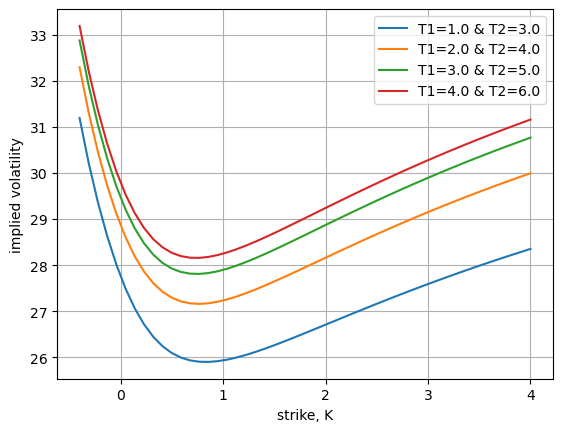

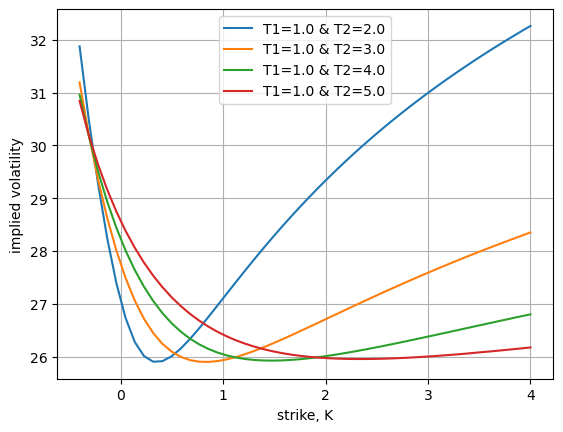

In [2]:
# set i= imaginary number
i   = complex(0.0,1.0)

# This class defines puts and calls
class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0

def CallPutOptionPriceCOSMthd_FrwdStart(cf,CP,r,T1,T2,K,N,L):
    # cf   - characteristic function as a functon, in the book denoted as \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # r    - interest rate (constant)
    # K    - list of strikes
    # N    - Number of expansion terms
    # L    - size of truncation domain (typ.:L=8 or L=10)  
        
    tau = T2 - T1
    # reshape K to a column vector
    if K is not np.array:
        K = np.array(K).reshape([len(K),1])
    
    # Adjust strike
    K = K + 1.0
    
    #assigning i=sqrt(-1)
    i = complex(0.0,1.0) 
    x0 = np.log(1.0 / K)   
    
    # truncation domain
    a = 0.0 - L * np.sqrt(tau)
    b = 0.0 + L * np.sqrt(tau)
    
    # sumation from k = 0 to k=N-1
    k = np.linspace(0,N-1,N).reshape([N,1])  
    u = k * np.pi / (b - a);  

    # Determine coefficients for Put Prices  
    H_k = CallPutCoefficients(CP,a,b,k)   
    mat = np.exp(i * np.outer((x0 - a) , u))
    temp = cf(u) * H_k 
    temp[0] = 0.5 * temp[0]    
    value = np.exp(-r * T2) * K * np.real(mat.dot(temp))     
    return value

# Determine coefficients for Put and Call Prices 
def CallPutCoefficients(CP,a,b,k):
    if CP==OptionType.CALL:                  
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k      = 2.0 / (b - a) * (Chi_k - Psi_k)  
    elif CP==OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k      = 2.0 / (b - a) * (- Chi_k + Psi_k)               
    
    return H_k    

def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0)) 
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi 
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * 
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k 
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    
    value = {"chi":chi,"psi":psi }
    return value
    
# Forward start Black-Scholes option price
def BS_Call_Option_Price_FrwdStart(K,sigma,T1,T2,r):
    if K is list:
        K = np.array(K).reshape([len(K),1])
    K = K + 1.0 
    tau = T2 - T1
    d1    = (np.log(1.0 / K) + (r + 0.5 * np.power(sigma,2.0))* tau) / (sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)
    value = np.exp(-r*T1) * st.norm.cdf(d1) - st.norm.cdf(d2) * K * np.exp(-r * T2)
    return value

# Implied volatility for the forward start call option
def ImpliedVolatility_FrwdStart(marketPrice,K,T1,T2,r):
    # To determine initial volatility we interpolate define a grid for sigma
    # and interpolate on the inverse
    sigmaGrid = np.linspace(0,2,200)
    optPriceGrid = BS_Call_Option_Price_FrwdStart(K,sigmaGrid,T1,T2,r)
    sigmaInitial = np.interp(marketPrice,optPriceGrid,sigmaGrid)
    print("Initial volatility = {0}".format(sigmaInitial))
    
    # Use determined input for the local-search (final tuning)
    func = lambda sigma: np.power(BS_Call_Option_Price_FrwdStart(K,sigma,T1,T2,r) - marketPrice, 1.0)
    impliedVol = optimize.newton(func, sigmaInitial, tol=1e-15)
    print("Final volatility = {0}".format(impliedVol))
    return impliedVol

def ChFHestonModelForwardStart(r,T1,T2,kappa,gamma,vbar,v0,rho):
    i = complex(0.0,1.0)
    tau = T2 - T1
    D1 = lambda u: np.sqrt(np.power(kappa-gamma*rho*i*u,2)+(u*u+i*u)*gamma*gamma)
    g  = lambda u: (kappa-gamma*rho*i*u-D1(u))/(kappa-gamma*rho*i*u+D1(u))
    C  = lambda u: (1.0-np.exp(-D1(u)*tau))/(gamma*gamma*(1.0-g(u)*np.exp(-D1(u)*tau)))\
        *(kappa-gamma*rho*i*u-D1(u))
    # Note that we exclude the term -r*tau, as the discounting is performed in the COS method
    A  = lambda u: r*i*u*tau + kappa*vbar*tau/gamma/gamma *(kappa-gamma*rho*i*u-D1(u))\
        - 2*kappa*vbar/gamma/gamma*np.log((1.0-g(u)*np.exp(-D1(u)*tau))/(1.0-g(u)))
    c_bar = lambda t1,t2: gamma*gamma/(4.0*kappa) * (1.0 - np.exp(-kappa*(t2-t1)))
    delta = 4.0*kappa*vbar/gamma/gamma
    kappa_bar = lambda t1, t2: 4.0*kappa*v0*np.exp(-kappa*(t2-t1))/(gamma*gamma*(1.0-np.exp(-kappa*(t2-t1))))
    term1 = lambda u: A(u) + C(u)*c_bar(0.0,T1)*kappa_bar(0.0,T1)/(1.0-2.0*C(u)*c_bar(0.0,T1))
    term2 = lambda u: np.power(1.0/(1.0-2.0*C(u)*c_bar(0.0,T1)),0.5*delta)
    cf = lambda u: np.exp(term1(u)) * term2(u)
    return cf

def mainCalculation():
    CP  = OptionType.CALL
    r   = 0.00
    
    TMat1=[[1.0,3.0],[2.0,4.0],[3.0, 5.0],[4.0, 6.0]]
    TMat2=[[1.0,2.0],[1.0,3.0],[1.0, 4.0],[1.0, 5.0]]
        
    K = np.linspace(-0.4,4.0,50)
    K = np.array(K).reshape([len(K),1])
    
    N = 500
    L = 10
        
    # Heston model parameters
    kappa = 0.6
    gamma = 0.2
    vbar  = 0.1
    rho   = -0.5
    v0    = 0.05   

    plt.figure(1)
    plt.grid()
    plt.xlabel('strike, K')
    plt.ylabel('implied volatility')
    legend = []
    for T_pair in TMat1:
       T1= T_pair[0]
       T2= T_pair[1]
       cf = ChFHestonModelForwardStart(r,T1,T2,kappa,gamma,vbar,v0,rho)
       # Forward-start option from the COS method
       valCOS = CallPutOptionPriceCOSMthd_FrwdStart(cf,CP,r,T1,T2,K,N,L)
       # Implied volatilities
       IV =np.zeros([len(K),1])
       for idx in range(0,len(K)):
           IV[idx] = ImpliedVolatility_FrwdStart(valCOS[idx],K[idx],T1,T2,r)
       plt.plot(K,IV*100.0)
       legend.append('T1={0} & T2={1}'.format(T1,T2))
    plt.legend(legend)
    
    plt.figure(2)
    plt.grid()
    plt.xlabel('strike, K')
    plt.ylabel('implied volatility')
    legend = []
    for T_pair in TMat2:
       T1= T_pair[0]
       T2= T_pair[1]
       cf = ChFHestonModelForwardStart(r,T1,T2,kappa,gamma,vbar,v0,rho)
       
       # Forward-start option from the COS method
       valCOS = CallPutOptionPriceCOSMthd_FrwdStart(cf,CP,r,T1,T2,K,N,L)
    
       # Implied volatilities
       IV =np.zeros([len(K),1])
       for idx in range(0,len(K)):
           IV[idx] = ImpliedVolatility_FrwdStart(valCOS[idx],K[idx],T1,T2,r)
       plt.plot(K,IV*100.0)
       legend.append('T1={0} & T2={1}'.format(T1,T2))
       
    plt.legend(legend)

mainCalculation()

## The model of Bates

Empirical studies have shown that the Heston model is not able to calibrate well to short-term implied volatilities. 
The Bates model also generalizes the Heston model by adding jumps to the Heston stock price process. 
The Heston model is described by the following system of SDEs:
\begin{cases}
\frac{dS(t)}{S(t)} =(r - \xi_p[e^J-1])dt + \sqrt{v(t)}dW_x(t) + (e^J-1)dX_{\mathcal{P}}(t)\\
dv(t) = \kappa (\bar{v} - v(t))dt + \gamma \sqrt{v(t)}dW_v(t)
\end{cases}

with Poisson Process $X_\mathcal{P}(t)$ with intensity $\xi_p$ and normally distributed jump sizes, J, with expectation $u_J$ and variance $\sigma^2_J$
$$ J \sim \mathcal{N}(u_j,\sigma^2_j)$$
 $X_p$ is assumed to be independent of the Brownian motion and the jump sizes. 
 

Under the log transformation, the Bates model reads
\begin{cases}
dX(t)=(r - \frac{1}{2} v(t) - \xi_p\mathbb{E}[e^J-1]) dt + \sqrt{v(t)}dW_x(t) +JdX_{\mathcal{P}}(t)\\
dv(t) = \kappa (\bar{v} - v(t))dt + \gamma \sqrt{v(t)}dW_v(t)
\end{cases}

The PIDE for the Bates model, under the risk-neutral measure, can now be derived and it is given, for $V=V(t,X)$ by:
$$ \frac{\partial V}{\partial t} + (r  - \frac{1}{2}v - \xi_p \mathbb{E}[e^J-1]) \frac{\partial V}{\partial X} + \kappa (\bar{v} - v(t)) \frac{\partial V}{\partial v} + \frac{1}{2} \gamma^2v \frac{\partial^2 V}{\partial v^2} + \frac{1}{2} v \frac{\partial^2 V}{\partial X^2} + \rho_{x,v}\gamma v \frac{\partial^2 V}{\partial X \partial v} + \xi_p \mathbb{E}[V(t,X+J)] = (r+ \xi_p)V $$

The bates model belongs to the class of affine jump diffusion processes, therefore we can derive the characteristic  function for the state-vector $\textbf{X}(t) = [X(t), v(t)]^T$. The model is based on the same covariance matrix as the Heston model. 
$$ \bar{\sigma}\bar{\sigma}^T = \bigg[ \begin{matrix}
v(t) & 0 \\
 2 \rho_{x,v} \lambda \sqrt{v(t)}& \lambda^2 v(t) \end{matrix}\bigg] =\bigg[ \begin{matrix}
c_{0,1,1} + c_{1,1,1} v & c_{0,1,2} + c_{1,1,2}v \\
  c_{0,2,1} + c_{1,2,1} v &  c_{0,2,2} + c_{1,2,2} v \end{matrix}\bigg] $$ 
The jump component is given by
$$\bar{\xi_p}(t,X(t)) = \xi_{p,0} + \xi_{p,1} X(t) =\xi_p$$

and the interest rate component is given by
$$ a_0 = \left\{
\begin{array}{l}
 r - \xi_p\mathbb{E}[e^J-1]\\
\kappa \bar{v}\\
\end{array}
\right.$$

$$ a_1=\left\{
\begin{array}{l}
0 & - \frac{1}{2}\\
0 & - \kappa \\
\end{array}
\right. $$

With 
- $\textbf{J}= [J,0]$
- $\bar{\textbf{B}}(z,\tau) = [\bar{B}(z,\tau), \bar{C}(z,\tau)]^T$


The functions $ \bar{A}_{\text{Bates}} (z,\tau)$, $ \bar{B}(z,\tau)$ and  $ C(z,\tau)$ satisfy the following system of ODEs:
- $ \frac{d\bar{B}}{d \tau} = 0 $
- $ \frac{d\bar{C}}{d\tau} = \frac{1}{2} \bar{B}(\bar{B} - 1) - (\kappa - \gamma \rho_{x,v}\bar{B}) \bar{C} + \frac{1}{2} \gamma^2 \bar{C}^2$ 
- $ \frac{dA_{\text{Bates}}}{d\tau} = \kappa \bar{v} \bar{C} + r(\bar{B} - 1) - \xi_p\mathbb{E}[e^J-1]\bar{B} + \xi_p\mathbb{E}[e^{J\bar{B}} -1]$ 
with initial conditions $\bar{B}(z,0)=iz$, \bar{C}(z,0)=0 and $A_{\text{Bates}}$(z,0)=0. 
<br> <br>
And the parameters $ \kappa , \gamma, \bar{v},r$ and $\rho_{x,r}$ are as in the Heston model.

the functions $\bar{B}(z,\tau)$ and $\bar{C}(z,\tau)$ are the same as for the standard heston model. The Bates and the Heston model differ only in  $\bar{A}_{\text{Bates}}(z,/tau)$ which in the Bates model contains jump components.
As the jumps J in Bstes model are normally distributed, with mean $u_J$ and variance $\sigma^2_J$, the two expectations in the ODEs for $\bar{A}_{\text{Bates}}(z,\tau)$ are given by:
$$ \mathbb{E}[e^J-1] = e^{\mu_J + \frac{1}{2}\sigma^2_J} -1$$
$$  \mathbb{E}[e^{izJ}-1] = e^{iz\mu_J + \frac{1}{2}\sigma^2_Jz^2} -1$$

so that the ODE for \bar{A}_{\text{Bates}}(z, \tau) reads:
$$ \frac{d\bar{A}_{\text{Bates}}(z,\tau)}{d \tau} =  \frac{d\bar{A}(z,\tau)}{d\tau} - \xi_p iz\tau \bigg(e^{\mu_J} + \frac{1}{2}\sigma^2_J -1\bigg) + \xi_p \tau \bigg(e^{iz\mu_J - \frac{1}{2}\sigma^2_J z^2} -1 \bigg)$$

the solution for $\bar{A}_{\text{Bates}(8z,\tau)}$ can also easily be found as:
$$ \bar{A}_{\text{Bates}}(z,\tau) = \bar{A}(z,\tau) - \xi_p iz\tau \bigg(e^{\mu_J} + \frac{1}{2}\sigma^2_J -1\bigg) + \xi_p \tau \bigg(e^{iz\mu_J - \frac{1}{2}\sigma^2_J z^2} -1 \bigg)$$

## Bates model application
- $T=1$
- $S_0=100$


/var/folders/zv/yh2kwtrj003cc_tbwt7gr8r40000gn/T/ipykernel_16304/1055480992.py:97: RuntimeWarning: divide by zero encountered in divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0))


Initial volatility = [0.25040538]
Final volatility = [0.25059091]
Initial volatility = [0.24041659]
Final volatility = [0.24050395]
Initial volatility = [0.23321919]
Final volatility = [0.2332936]
Initial volatility = [0.22754485]
Final volatility = [0.22756462]
Initial volatility = [0.22280138]
Final volatility = [0.22280128]
Initial volatility = [0.21873632]
Final volatility = [0.21875958]
Initial volatility = [0.21522431]
Final volatility = [0.21532504]
Initial volatility = [0.21238324]
Final volatility = [0.21247909]
Initial volatility = [0.21021393]
Final volatility = [0.21031315]
Initial volatility = [0.20875231]
Final volatility = [0.20907436]
Initial volatility = [0.26570325]
Final volatility = [0.26626029]
Initial volatility = [0.25016176]
Final volatility = [0.2502666]
Initial volatility = [0.24067142]
Final volatility = [0.24069274]
Initial volatility = [0.23427491]
Final volatility = [0.23429125]
Initial volatility = [0.22979074]
Final volatility = [0.22979065]
Initial vola

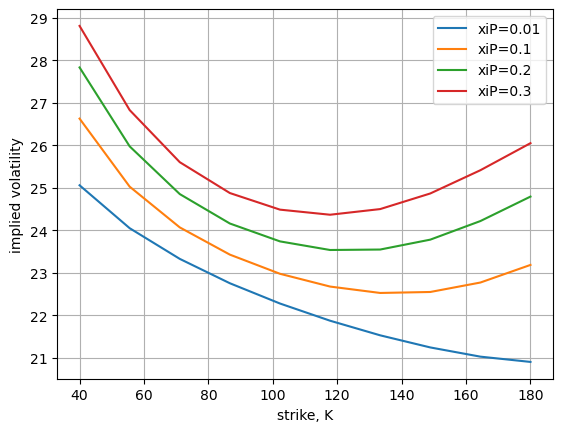

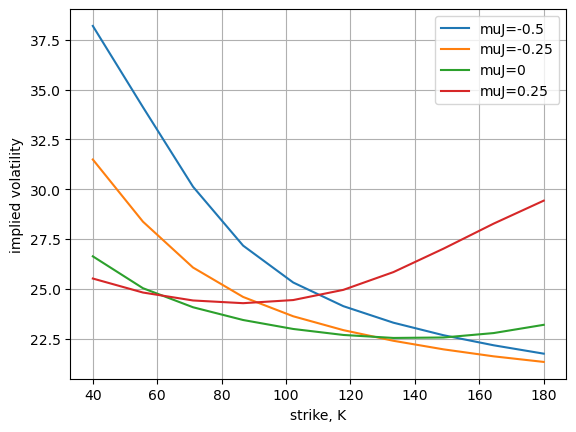

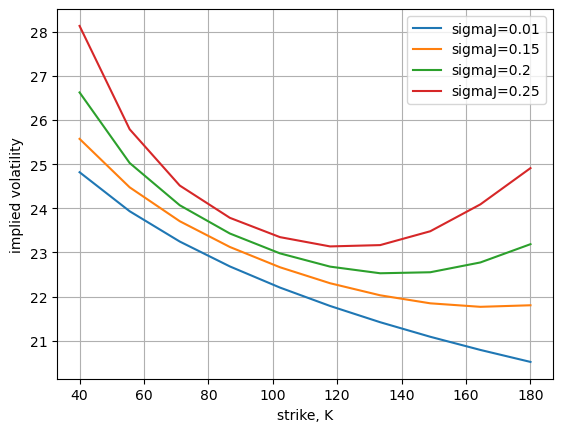

In [3]:
#%%
"""
Created on Thu Nov 30 2018
The Bates Model and implied volatilities obtained with the COS method
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 
import scipy.optimize as optimize

# set i= imaginary number
i   = complex(0.0,1.0)

# This class defines puts and calls
class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0
    
def CallPutOptionPriceCOSMthd(cf,CP,S0,r,tau,K,N,L):
    # cf   - characteristic function as a functon, in the book denoted as \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # r    - interest rate (constant)
    # tau  - time to maturity
    # K    - list of strikes
    # N    - Number of expansion terms
    # L    - size of truncation domain (typ.:L=8 or L=10)  
        
    # reshape K to a column vector
    if K is not np.array:
        K = np.array(K).reshape([len(K),1])
    
    #assigning i=sqrt(-1)
    i = complex(0.0,1.0) 
    x0 = np.log(S0 / K)   
    
    # truncation domain
    a = 0.0 - L * np.sqrt(tau)
    b = 0.0 + L * np.sqrt(tau)
    
    # sumation from k = 0 to k=N-1
    k = np.linspace(0,N-1,N).reshape([N,1])  
    u = k * np.pi / (b - a);  

    # Determine coefficients for Put Prices  
    H_k = CallPutCoefficients(CP,a,b,k)   
    mat = np.exp(i * np.outer((x0 - a) , u))
    temp = cf(u) * H_k 
    temp[0] = 0.5 * temp[0]    
    value = np.exp(-r * tau) * K * np.real(mat.dot(temp))     
    return value

# Determine coefficients for Put Prices 
def CallPutCoefficients(CP,a,b,k):
    if CP==OptionType.CALL:                  
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k      = 2.0 / (b - a) * (Chi_k - Psi_k)  
    elif CP==OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k      = 2.0 / (b - a) * (- Chi_k + Psi_k)               
    
    return H_k    

def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0)) 
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi 
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * 
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k 
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    
    value = {"chi":chi,"psi":psi }
    return value
    
# Black-Scholes Call option price
def BS_Call_Option_Price(CP,S_0,K,sigma,tau,r):
    if K is list:
        K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) 
    * tau) / (sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * tau)
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S_0
    return value

# Implied volatility method
def ImpliedVolatility(CP,marketPrice,K,T,S_0,r):
    # To determine initial volatility we interpolate define a grid for sigma
    # and interpolate on the inverse
    sigmaGrid = np.linspace(0,2,200)
    optPriceGrid = BS_Call_Option_Price(CP,S_0,K,sigmaGrid,T,r)
    sigmaInitial = np.interp(marketPrice,optPriceGrid,sigmaGrid)
    print("Initial volatility = {0}".format(sigmaInitial))
    
    # Use determined input for the local-search (final tuning)
    func = lambda sigma: np.power(BS_Call_Option_Price(CP,S_0,K,sigma,T,r) - marketPrice, 1.0)
    impliedVol = optimize.newton(func, sigmaInitial, tol=1e-10)
    print("Final volatility = {0}".format(impliedVol))
    return impliedVol

def ChFBatesModel(r,tau,kappa,gamma,vbar,v0,rho,xiP,muJ,sigmaJ):
    i = complex(0.0,1.0)
    D1 = lambda u: np.sqrt(np.power(kappa-gamma*rho*i*u,2)+(u*u+i*u)*gamma*gamma)
    g  = lambda u: (kappa-gamma*rho*i*u-D1(u))/(kappa-gamma*rho*i*u+D1(u))
    C  = lambda u: (1.0-np.exp(-D1(u)*tau))/(gamma*gamma*(1.0-g(u)*\
                               np.exp(-D1(u)*tau)))*(kappa-gamma*rho*i*u-D1(u))
    # Note that we exclude the term -r*tau, as the discounting is performed in the COS method
    AHes= lambda u: r * i*u *tau + kappa*vbar*tau/gamma/gamma *(kappa-gamma*\
        rho*i*u-D1(u)) - 2*kappa*vbar/gamma/gamma*np.log((1.0-g(u)*np.exp(-D1(u)*tau))/(1.0-g(u)))
    
    A = lambda u: AHes(u) - xiP * i * u * tau *(np.exp(muJ+0.5*sigmaJ*sigmaJ) - 1.0) + \
            xiP * tau * (np.exp(i*u*muJ - 0.5 * sigmaJ * sigmaJ * u * u) - 1.0)
    
    # Characteristic function for the Heston's model    
    cf = lambda u: np.exp(A(u) + C(u)*v0)
    return cf 

def mainCalculation():
    CP  = OptionType.CALL
    S0  = 100.0
    r   = 0.0
    tau = 1.0
    
    K = np.linspace(40,180,10)
    K = np.array(K).reshape([len(K),1])
    
    N = 1000
    L = 6
        
    kappa = 1.2
    gamma = 0.05
    vbar  = 0.05
    rho   = -0.75
    v0    = vbar
    muJ   = 0.0
    sigmaJ= 0.2
    xiP   = 0.1
    
    # effect of xiP
    plt.figure(1)
    plt.grid()
    plt.xlabel('strike, K')
    plt.ylabel('implied volatility')
    xiPV = [0.01, 0.1, 0.2, 0.3]
    legend = []
    for xiPTemp in xiPV:    
       # Evaluate the Bates model
       # Compute ChF for the Bates
       cf = ChFBatesModel(r,tau,kappa,gamma,vbar,v0,rho,xiPTemp,muJ,sigmaJ)
         
       # The COS method
       valCOS = CallPutOptionPriceCOSMthd(cf, CP, S0, r, tau, K, N, L)
        
       # Implied volatilities
       IV =np.zeros([len(K),1])
       for idx in range(0,len(K)):
           IV[idx] = ImpliedVolatility(CP,valCOS[idx],K[idx],tau,S0,r)
       plt.plot(K,IV*100.0)
       legend.append('xiP={0}'.format(xiPTemp))
    plt.legend(legend)
    
    # effect of muJ
    plt.figure(2)
    plt.grid()
    plt.xlabel('strike, K')
    plt.ylabel('implied volatility')
    muJPV = [-0.5, -0.25, 0, 0.25]
    legend = []
    for muJTemp in muJPV:    
       # Evaluate the Bates model
       # Compute ChF for the Bates
       cf = ChFBatesModel(r,tau,kappa,gamma,vbar,v0,rho,xiP,muJTemp,sigmaJ)
         
       # The COS method
       valCOS = CallPutOptionPriceCOSMthd(cf, CP, S0, r, tau, K, N, L)
        
       # Implied volatilities
       IV =np.zeros([len(K),1])
       for idx in range(0,len(K)):
           IV[idx] = ImpliedVolatility(CP,valCOS[idx],K[idx],tau,S0,r)
       plt.plot(K,IV*100.0)
       legend.append('muJ={0}'.format(muJTemp))
    plt.legend(legend)
    
    # effect of sigmaJ
    plt.figure(3)
    plt.grid()
    plt.xlabel('strike, K')
    plt.ylabel('implied volatility')
    sigmaJV = [0.01, 0.15, 0.2, 0.25]
    legend = []
    for sigmaJTemp in sigmaJV:    
       # Evaluate the Bates model
       # Compute ChF for the Bates
       cf = ChFBatesModel(r,tau,kappa,gamma,vbar,v0,rho,xiP,muJ,sigmaJTemp)
         
       # The COS method
       valCOS = CallPutOptionPriceCOSMthd(cf, CP, S0, r, tau, K, N, L)
        
       # Implied volatilities
       IV =np.zeros([len(K),1])
       for idx in range(0,len(K)):
           IV[idx] = ImpliedVolatility(CP,valCOS[idx],K[idx],tau,S0,r)
       plt.plot(K,IV*100.0)
       legend.append('sigmaJ={0}'.format(sigmaJTemp))
    plt.legend(legend)
    
mainCalculation()

## Variance Swaps
Volatility can be measured, indirectly by continuos observation of the stock performance. A variance swap payoff is defined as:
$$ V(T, \sigma_v) = \frac{252}{n}\sum_{i=1}^{n} \bigg(ln \frac{S(t_i)}{S(t_{i-1})}\bigg)^2 - K \coloneqq \sigma^2_v(T) - K$$ 


$\sigma^2_v$ : Realized variance over the life of the swap, 252 is the number of business days in a year.
The strike K is chosen in such a way that the value of the contract is initially equal to 0.

Assuming the interest rate is deterministic, the contract value at time $t_0$ reads:
$$ V(t_0, \sigma_v) = e^{-r(T-t_0)} \mathbb{E}^{\mathbb{Q}}[\sigma_v^2(T) - K | \mathcal{F}(t_0)] $$

therefore:
$$ K = \mathbb{E}^{\mathbb{Q}}[\sigma_v^2(T)| \mathcal{F}(t_0)] $$

Considering the previous definition for $V(T, \sigma_v)$:
$$ ln \frac{S(t_i)}{S(t_{i-1})} = ln S(t_i) - ln S(t_{i-1}) \xrightarrow[]{\delta_i \rightarrow 0} d \ ln S(t)

So that the expression squared equals:
$$ \bigg(ln \frac{S(t_i)}{S(t_{i-1})}\bigg)^2 \xrightarrow[]{\delta_i \rightarrow 0} (d \ ln S(t))^2$$

$$dS(t) = rS(t)dt + \sigma(t)S(t)dW(t)$$
$$ d \ ln S(t) = \bigg( r - \frac{1}{2}\sigma^2(t)\bigg)dt + \sigma(t)dW(t) $$

Using Ito's calculus we find:
$$ d \ ln S(t)^2 = \sigma^2(t) dt $$

The term $ \frac{252}{n}$ annualized the realized variance (it returns the percentage in yearly base)

Important definition:
$$ \frac{dS(t)}{S(t)}  - d \ ln S(t) = \bigg(rdt + \sigma(t)dW(t)\bigg) - \bigg[\bigg(r - \frac{1}{2}\sigma^2(t)\bigg)dt + \sigma (t) dW(t) \bigg] = \frac{1}{2}\sigma^2(t)dt $$

Therefore we can write:
$$ K= \mathbb{E}^{\mathbb{Q}}\bigg[ \frac{1}{T - t_0} \int_{t_0}^{T} \sigma^2(t)dt|\mathcal{F}_{t_0}\bigg]$$ 
$$ K= \mathbb{E}^{\mathbb{Q}}\bigg[ \frac{2}{T - t_0} \int_{t_0}^{T} \sigma^2(t)dt|\mathcal{F}_{t_0}\bigg]$$ 
$$ K=  \frac{2}{T - t_0}  \mathbb{E}^{\mathbb{Q}}\bigg[  \int_{t_0}^{T} \frac{dS(t)}{S(t)} - d \ ln S(t)| \mathcal{F}_{t_0}\bigg]$$
$$ K=  \frac{2}{T - t_0}  \mathbb{E}^{\mathbb{Q}}\bigg[  \int_{t_0}^{T} \frac{dS(t)}{S(t)}| \mathcal{F}_{t_0}\bigg] -  \frac{2}{T - t_0}  \mathbb{E}^{\mathbb{Q}}\bigg[ \int_{t_0}^{T} ln\frac{S(T)}{S(t_0)}| \mathcal{F}_{t_0}\bigg]$$
$$  K=  \frac{2}{T - t_0} \bigg\{ r(T - t_0) - \mathbb{E}^{\mathbb{Q}} \bigg[ln \frac{S(T)}{S(t_0)} | \mathcal{F}(t_0) \bigg]\bigg\}$$


where $\frac{S(T)}{S(t_0)}$ represent the rate of return of the underlying stock